In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as datetime
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [38]:
train_bene = pd.read_csv('Train_Beneficiarydata-1542865627584.csv')
train_inp = pd.read_csv('Train_Inpatientdata-1542865627584.csv')
train_out = pd.read_csv('Train_Outpatientdata-1542865627584.csv')
train_y = pd.read_csv('Train-1542865627584.csv')

train_inp_merge = pd.merge(train_bene, train_inp)
train_out_merge = pd.merge(train_bene, train_out)
train_df = pd.concat([train_inp_merge, train_out_merge])
train_df = pd.merge(train_df, train_y)
# #[i for i in train_inp_out_merge.columns if 'DOD' in i]
# #train_inp_out_merge
# train_df.columns

train_df.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt',
       'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'AdmissionDt',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DischargeDt',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'Cl

Index(['PotentialFraud', 'Provider'], dtype='object')


<Axes: xlabel='PotentialFraud', ylabel='Provider'>

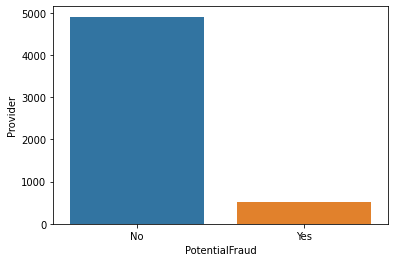

In [13]:
df_pf = train_y.groupby('PotentialFraud').count().reset_index()
print(df.columns)

sns.barplot(x='PotentialFraud', y='Provider', data=df)

<Axes: xlabel='Gender', ylabel='BeneID'>

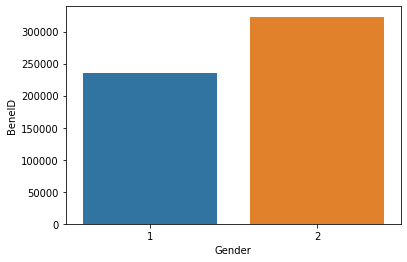

In [20]:
df_gender = train_df[['BeneID', 'Gender']].groupby('Gender').count().reset_index()
#print(df_gender.columns)
sns.barplot(x='Gender', y='BeneID', data=df_gender)

<Axes: xlabel='Race', ylabel='BeneID'>

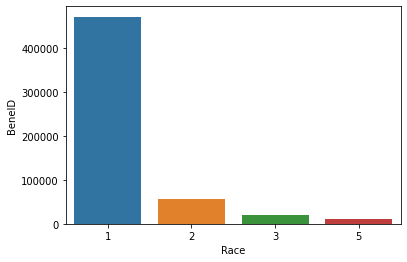

In [22]:
df_gender = train_df[['BeneID', 'Race']].groupby('Race').count().reset_index()
#print(df_gender.columns)
sns.barplot(x='Race', y='BeneID', data=df_gender)

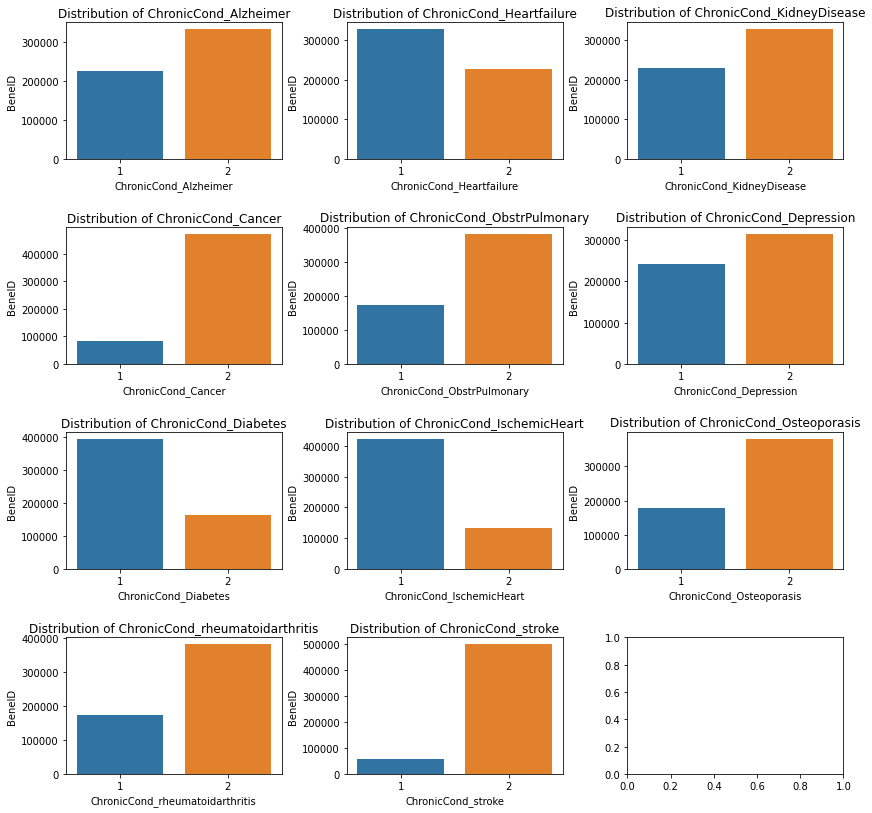

In [36]:
chronic_cond_features = ['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
                           'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 
                           'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis', 
                           'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']

fig, axes = plt.subplots(4, 3, figsize=(12, 12))

axes = axes.flatten()


for index, cond in enumerate(chronic_cond_features):
    df_cond = train_df[['BeneID', cond]].groupby(cond).count().reset_index()
    sns.barplot(x=cond, y='BeneID', data=df_cond, ax = axes[index])
    axes[index].set_title('Distribution of {}'.format(cond))
    
plt.subplots_adjust(top=0.95, bottom=0.08, left=0.05, right=0.95, hspace=0.5, wspace=0.3)

<Axes: xlabel='County', ylabel='BeneID'>

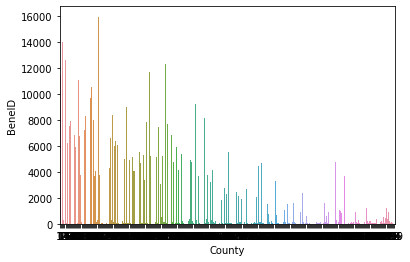

In [42]:
df_county = train_df[['BeneID', 'County']].groupby('County').count().reset_index()
#print(df_county.columns)
sns.barplot(x='County', y='BeneID', data=df_county)

In [44]:
train_df['AttendingPhysician'].value_counts()

AttendingPhysician
PHY330576    2534
PHY350277    1628
PHY412132    1321
PHY423534    1223
PHY314027    1200
             ... 
PHY406744       1
PHY397331       1
PHY419338       1
PHY362188       1
PHY392440       1
Name: count, Length: 82063, dtype: int64

In [45]:
train_df['County'].value_counts()

County
200    15957
10     13982
20     12632
470    12278
60     11995
       ...  
742        2
944        2
834        1
804        1
521        1
Name: count, Length: 314, dtype: int64